In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualisations
import seaborn as sns # for data visualisations

df = pd.read_csv('/kaggle/input/car-price-prediction/car_price_prediction_.csv')

In [2]:
print(df.head(20))

    Car ID     Brand  Year  Engine Size Fuel Type Transmission  Mileage  \
0        1     Tesla  2016          2.3    Petrol       Manual   114832   
1        2       BMW  2018          4.4  Electric       Manual   143190   
2        3      Audi  2013          4.5  Electric       Manual   181601   
3        4     Tesla  2011          4.1    Diesel    Automatic    68682   
4        5      Ford  2009          2.6    Diesel       Manual   223009   
5        6      Audi  2019          2.4    Diesel    Automatic   246553   
6        7      Audi  2020          4.0  Electric    Automatic   135486   
7        8     Tesla  2017          5.3    Hybrid    Automatic    83030   
8        9     Honda  2023          5.7  Electric       Manual   120360   
9       10      Ford  2010          1.5  Electric    Automatic   135009   
10      11     Tesla  2001          1.8    Diesel    Automatic   298875   
11      12      Ford  2017          5.7  Electric    Automatic   169737   
12      13      Ford  200

In [3]:
df.drop_duplicates()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [4]:
import pandas as pd

# Adding new column called age
df['age'] = 2024 - df['Year']
# Dropping the year column
df = df.drop(columns=['Year','Car ID'])

# Select numerical and categorical features
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])

# Display the updated DataFrame
print(df.head())


   Brand  Engine Size Fuel Type Transmission  Mileage Condition     Price  \
0  Tesla          2.3    Petrol       Manual   114832       New  26613.92   
1    BMW          4.4  Electric       Manual   143190      Used  14679.61   
2   Audi          4.5  Electric       Manual   181601       New  44402.61   
3  Tesla          4.1    Diesel    Automatic    68682       New  86374.33   
4   Ford          2.6    Diesel       Manual   223009  Like New  73577.10   

      Model  age  
0   Model X    8  
1  5 Series    6  
2        A4   11  
3   Model Y   13  
4   Mustang   15  


In [5]:
df.dtypes

Brand            object
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage           int64
Condition        object
Price           float64
Model            object
age               int64
dtype: object

# UNIVARIATE ANALYSIS
## CATEGORICAL DATA

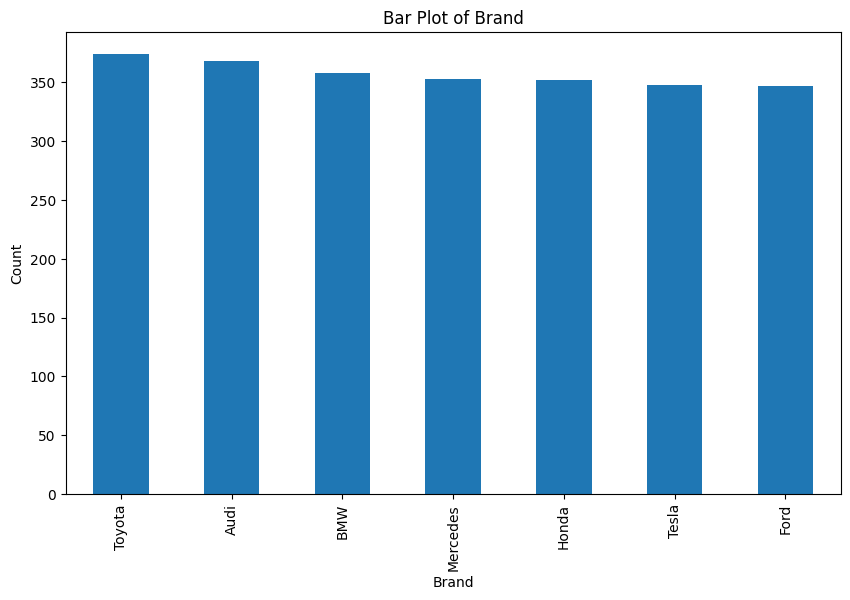

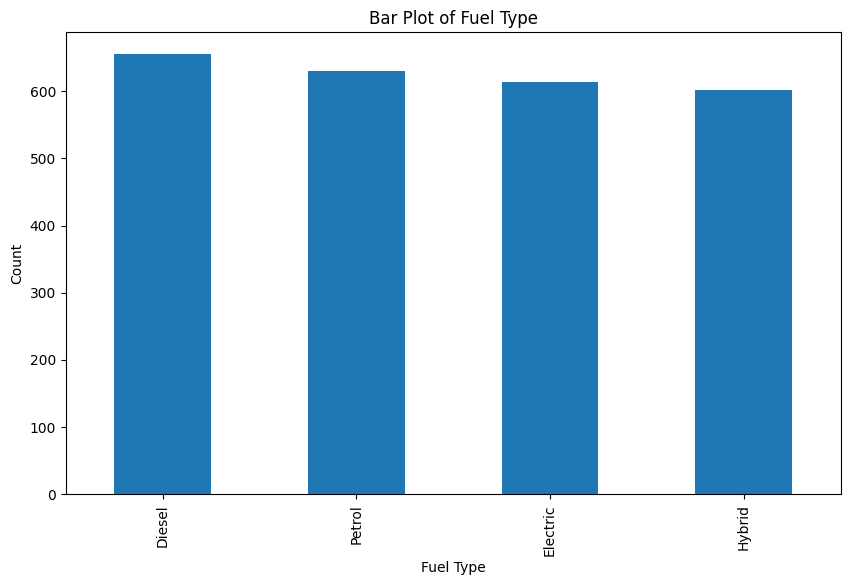

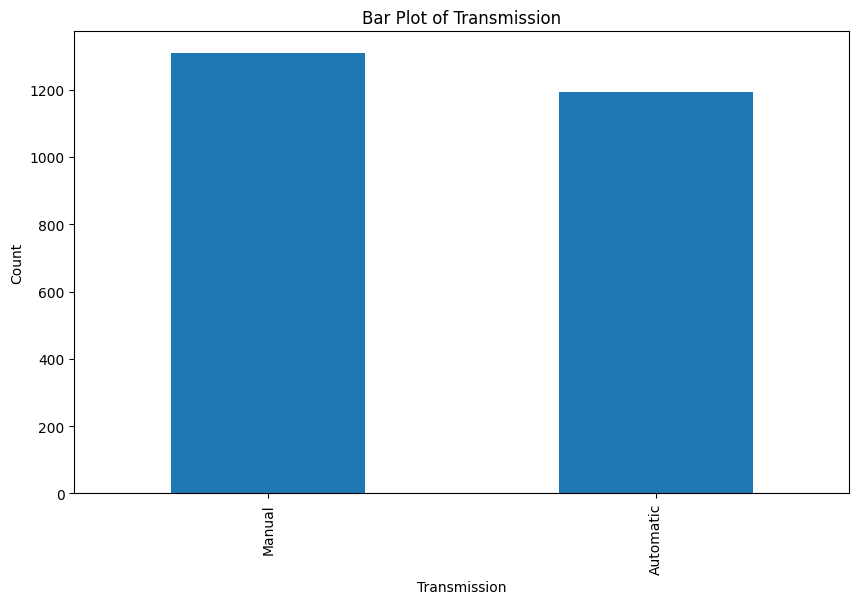

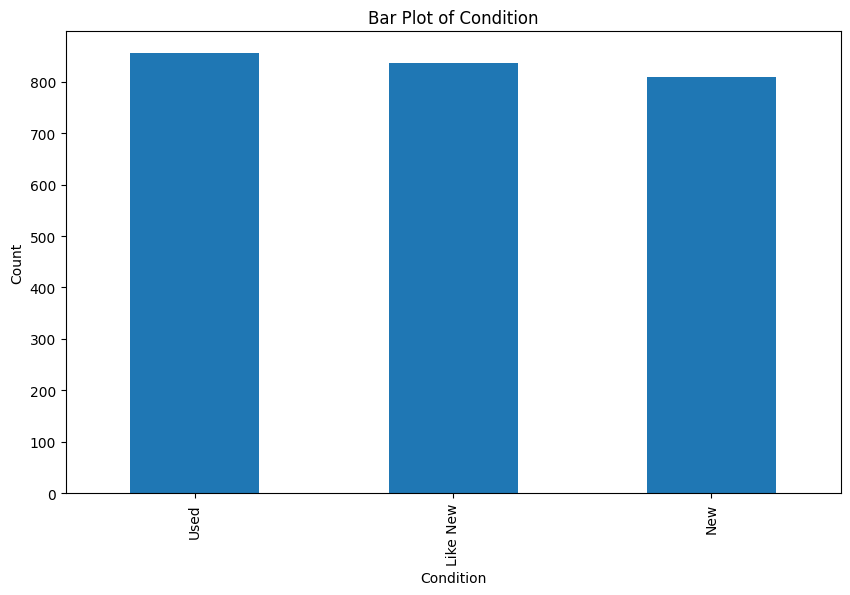

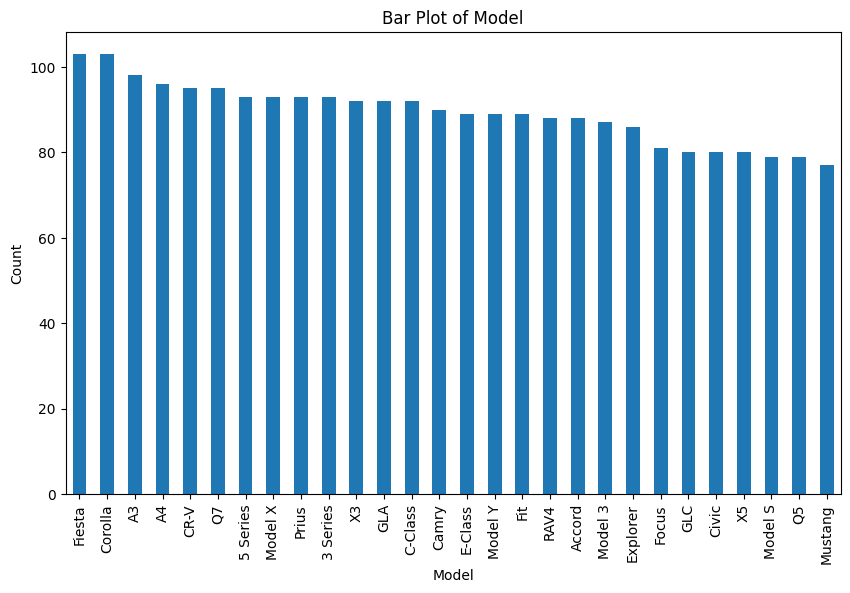

In [6]:
#bar plots
for i in cat_df.columns:
    plt.figure(figsize=(10, 6))
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()  

In [7]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size,2500.0,3.465240,1.432053,1.00,2.200,3.40,4.7000,6.00
Mileage,2500.0,149749.844800,87919.952034,15.00,71831.500,149085.00,225990.5000,299967.00
Price,2500.0,52638.022532,27295.833455,5011.27,28908.485,53485.24,75838.5325,99982.59
age,2500.0,12.373200,6.991700,1.00,6.000,12.00,19.0000,24.00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


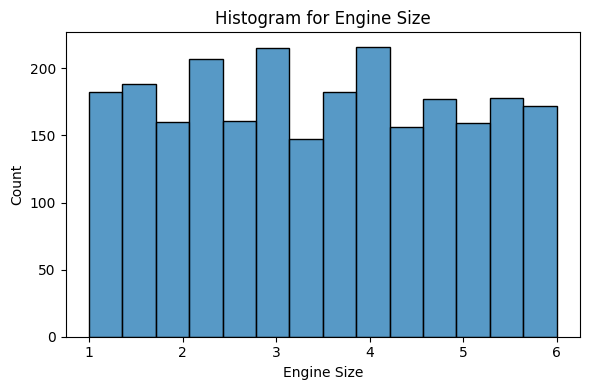

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


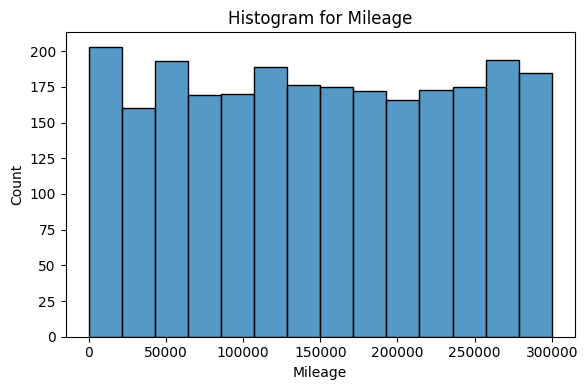

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


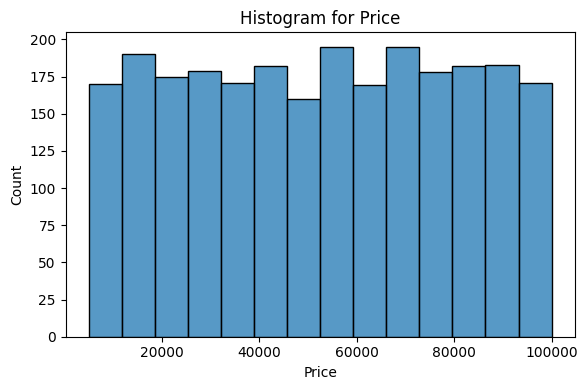

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


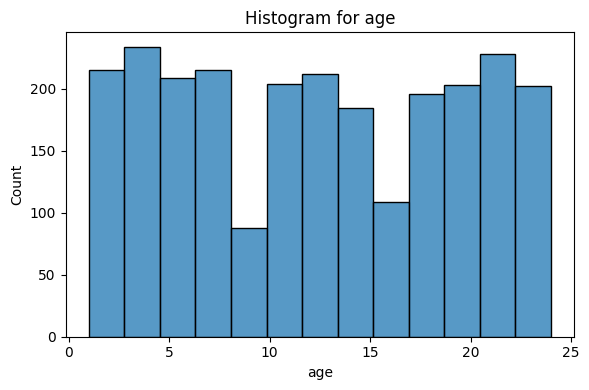

In [8]:
for i in num_df.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(data=num_df[i])
    plt.title(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

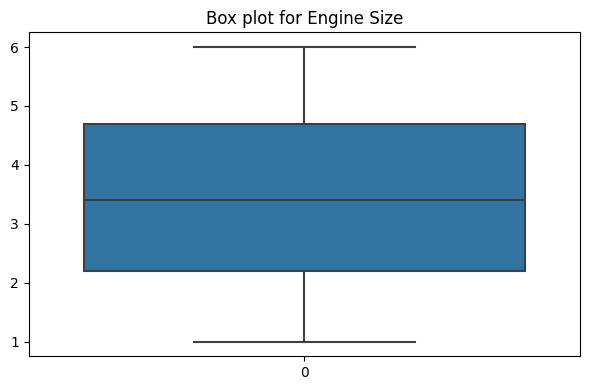

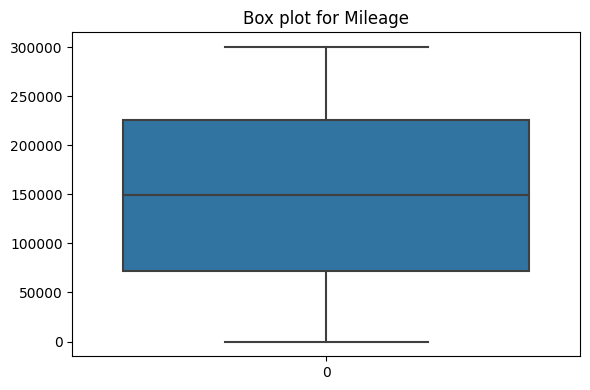

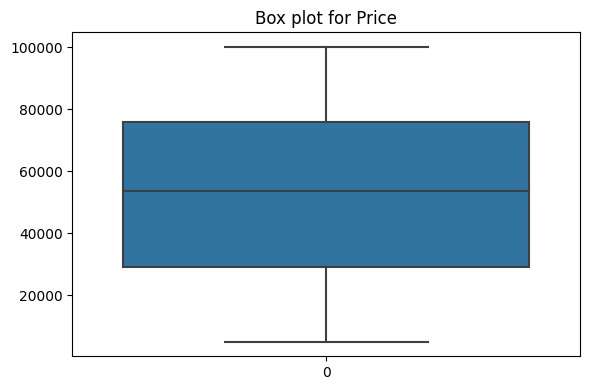

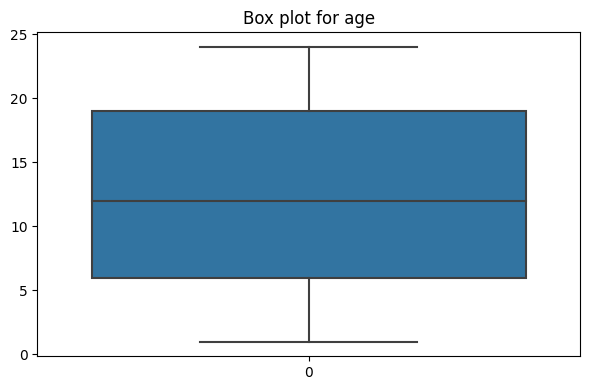

In [9]:
# Create separate box plots for each numerical column
for i in num_df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(data=num_df[i])
    plt.title(f'Box plot for {i}')
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


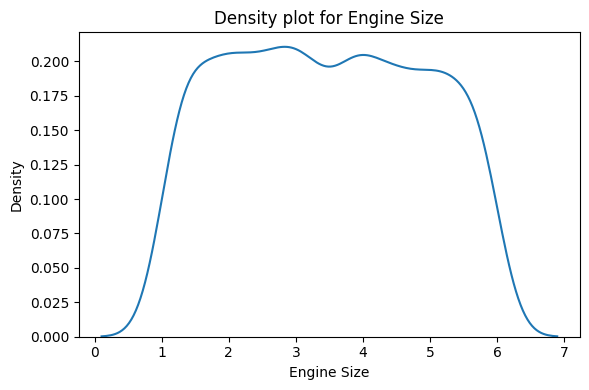

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


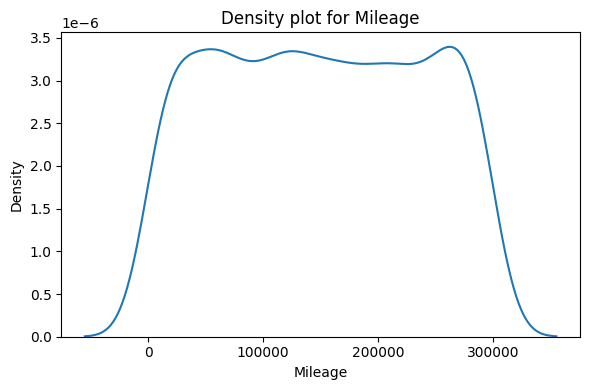

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


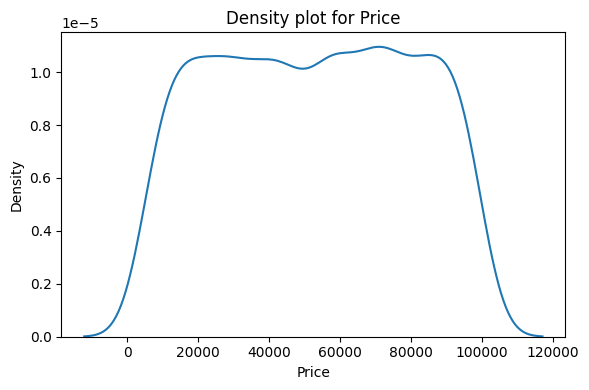

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


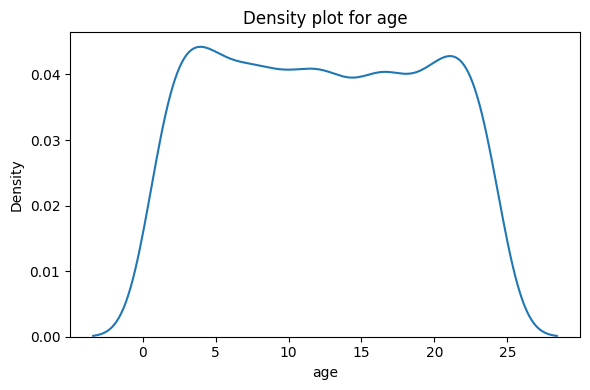

In [10]:
for column in num_df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.kdeplot(data=num_df[column])
    plt.title(f'Density plot for {column}')
    plt.tight_layout()
    plt.show()

In [11]:
import scipy.stats as stats
#Calculate skewness and kurtosis
skewness = num_df.skew()
kurtosis = num_df.apply(stats.kurtosis)

# Create a new DataFrame to display skewness and kurtosis
skew_kurt_df = pd.DataFrame({
    'skewness': skewness,
    'kurtosis': kurtosis
})

# Print the new table for skewness and kurtosis
print(skew_kurt_df)

             skewness  kurtosis
Engine Size  0.035972 -1.182983
Mileage      0.007337 -1.224902
Price       -0.014484 -1.207737
age          0.022938 -1.242990


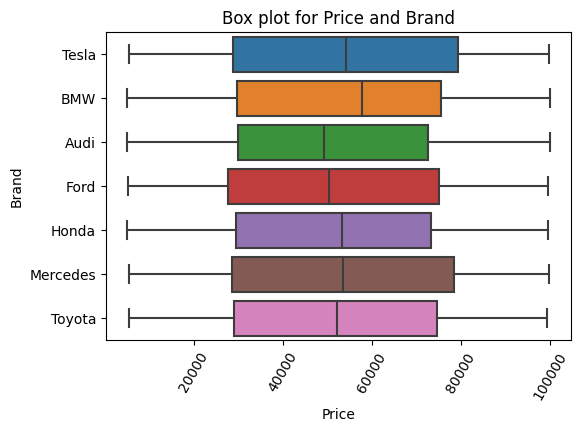

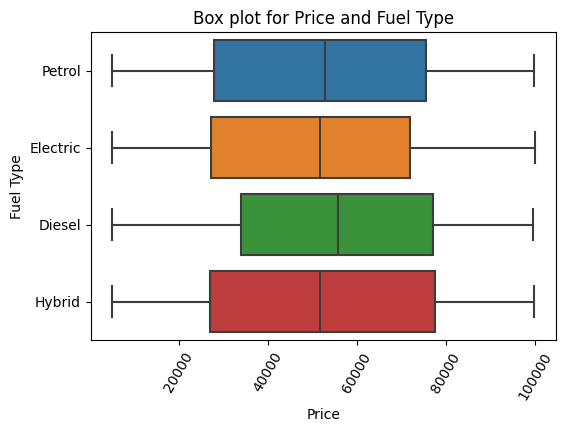

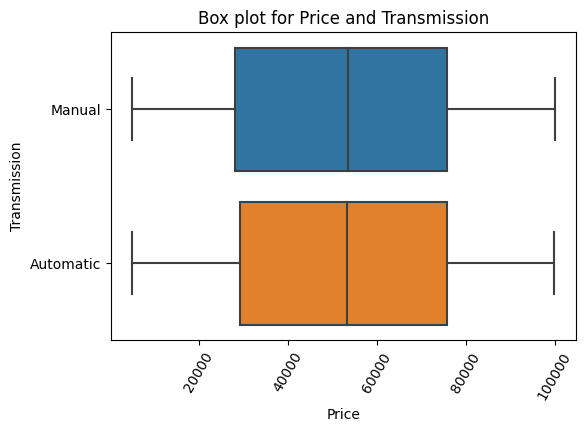

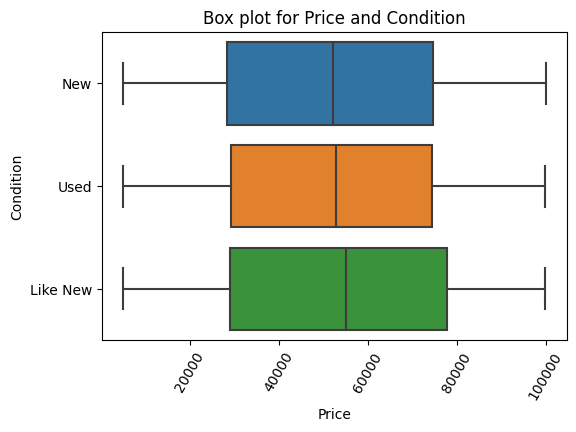

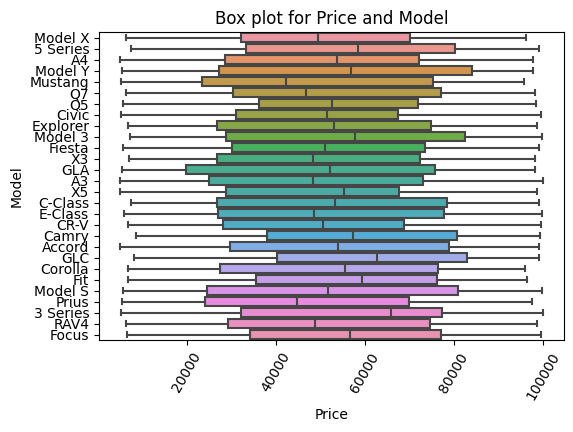

In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(6, 4))  # Set figure size for each plot
        sns.boxplot(data=df, x='Price', y=i)
        plt.xticks(rotation=60)
        plt.title(f'Box plot for Price and {i}')
        plt.show()

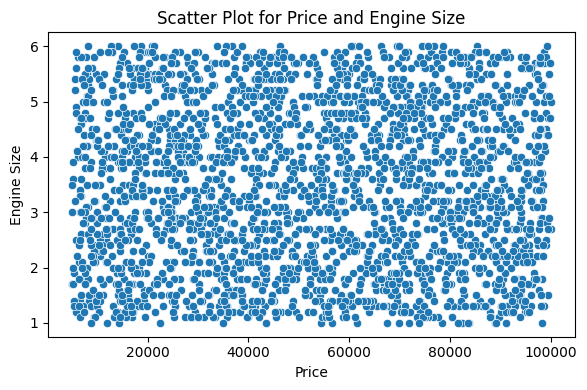

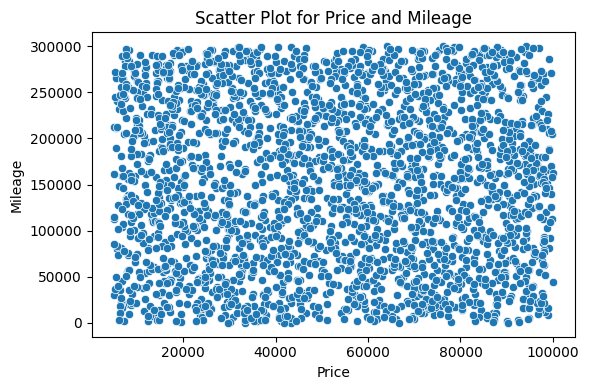

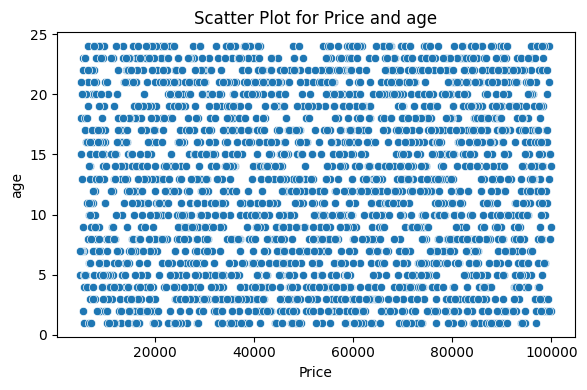

In [13]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i)
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            plt.show()

<Axes: >

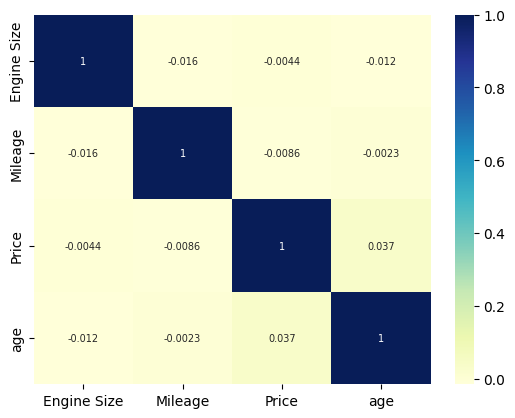

In [14]:
dataplot = sns.heatmap(num_df.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 7})

# Displaying heatmap
dataplot

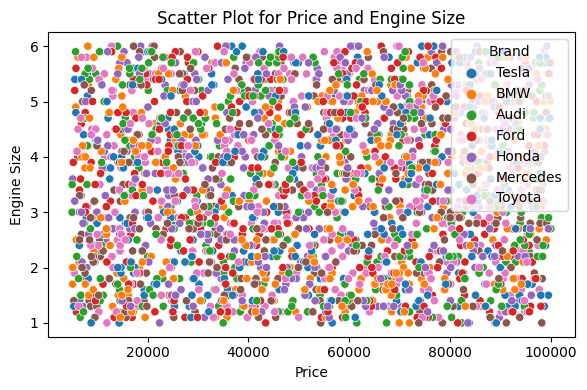

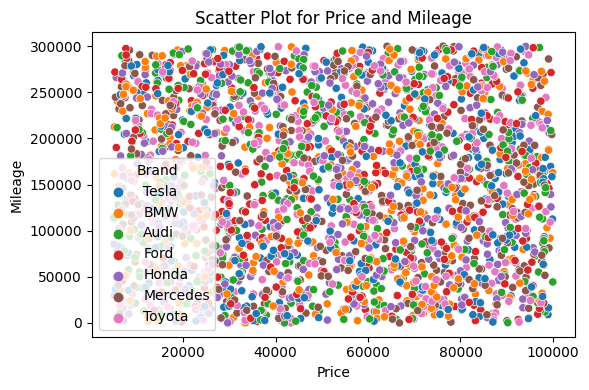

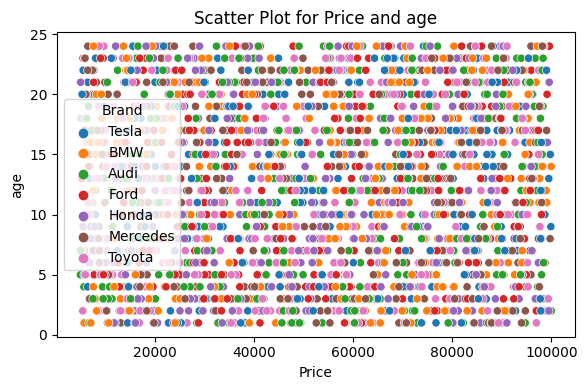

In [15]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i, hue = 'Brand')
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            plt.show()

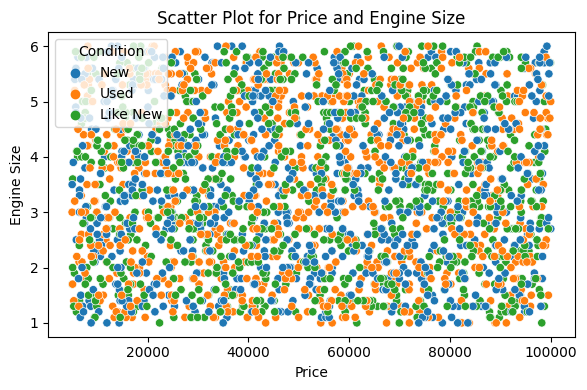

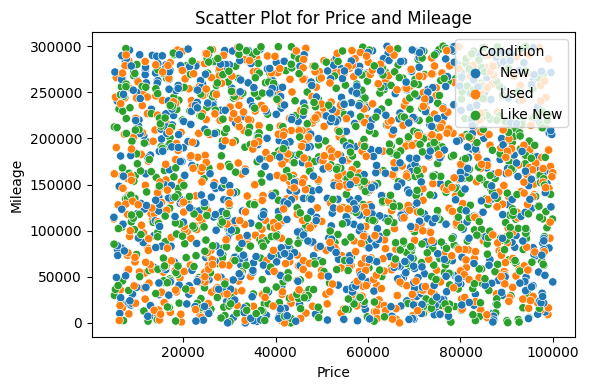

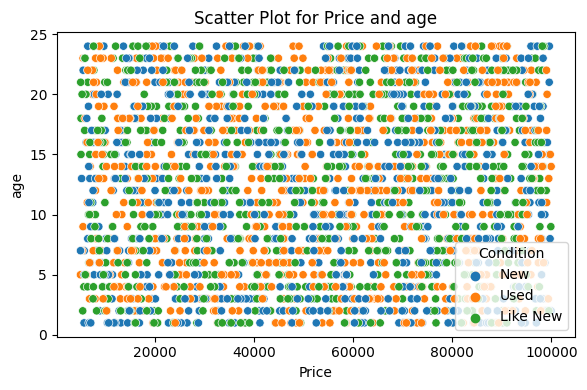

In [16]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i, hue= 'Condition')
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            plt.show()

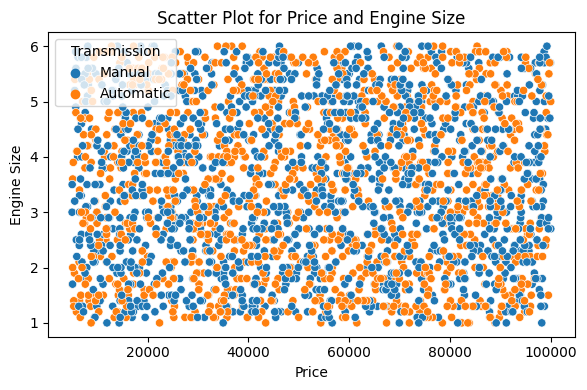

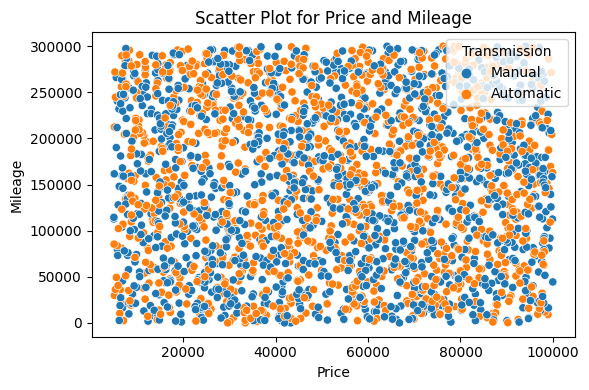

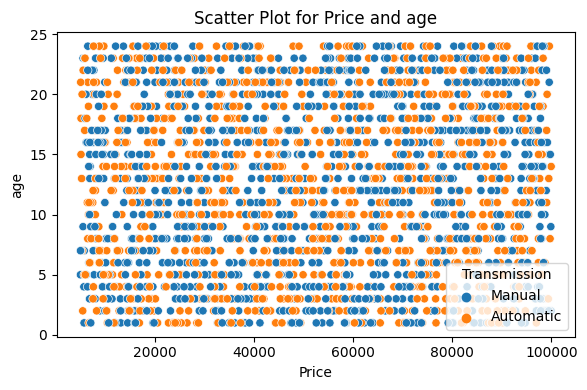

In [17]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i,hue='Transmission')
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            plt.show()